<a href="https://colab.research.google.com/github/electrojam/Curso-de-Clustering-con-Python-y-scikit-learn/blob/main/clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs # librería para crear nuestro set de datos
from sklearn.cluster import KMeans  # para ejecutar nuestra clusterización
from sklearn.metrics import silhouette_score  # para validar nuestro coeficiente de silueta, que tan bien está hecho nuestro cluster
from yellowbrick.cluster import SilhouetteVisualizer  # Visualización de cluster

## Preparando datos de prueba

In [4]:
# creamos nuestros datos
# 500 datos y desviación del cluster 0.8, con 4 clusters, solo 2 features para los centroides

x, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

# x tiene las dos dimensiones
# y tiene el cluster al que pertenecen los datos de X
# c tiene los 4 centroides

In [5]:
# Creamos nuestro data frame de data points
df_blobs = pd.DataFrame({
    'x1': x[:,0],
    'x2': x[:,1],
    'y': y
})

In [6]:
# Creamos nuestro data frame de centroides
df_centers = pd.DataFrame({
    'x1': c[:,0],
    'x2': c[:,1]
})

In [7]:
df_blobs

,x1,x2,y
0,-4.101968,4.046118,1
1,2.123461,4.059339,0
2,4.767018,-5.903708,2
3,2.483534,-5.212159,3
4,5.613223,-6.033330,2
...,...,...,...
495,6.651694,-5.309666,2
496,-1.918364,3.580246,1
497,3.593086,-5.890281,2
498,0.939310,5.386377,0


In [8]:
df_centers

,x1,x2
0,0.980706,4.831610
1,-3.976740,3.561917
2,5.524583,-5.353464
3,0.695800,-3.955141


## Visualización de datos

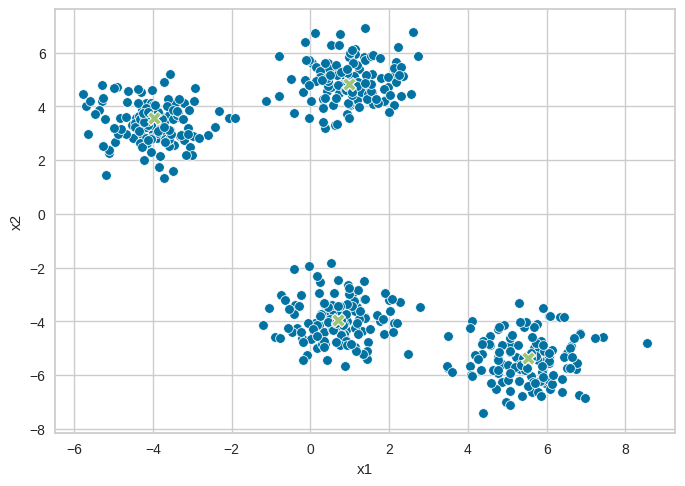

In [9]:
# graficamos los data points, y centroides
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.show()

## Aplicando K-means

In [10]:
# suponemos que tenemos 3 clusters
kmeans = KMeans(n_clusters=3, n_init='auto')
df_cluster = kmeans.fit_predict(x)
df_blobs['cluster'] = df_cluster  # creamos nueva columna a df_blobs con la predicción de df_cluster
k_means_centers = kmeans.cluster_centers_ # los centroides de la predicción o clusterización que estamos haciendo con KMeans
df_k_means_center = pd.DataFrame({
    'x1': k_means_centers[:,0],
    'x2': k_means_centers[:,1]
})

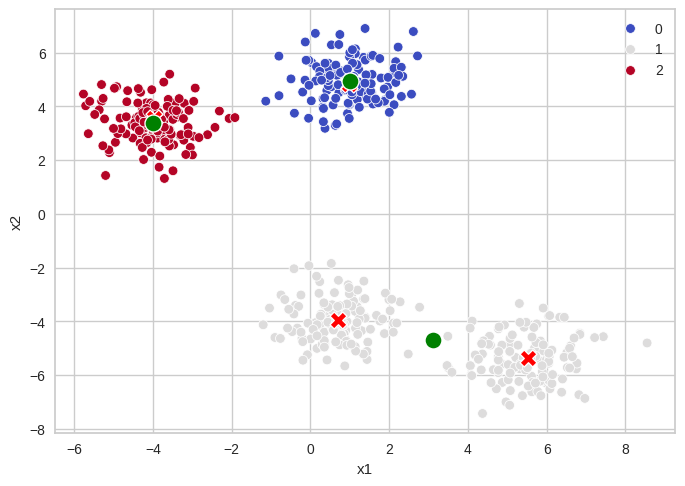

In [11]:
# Graficamos data points anteriores, centroides anteriores y centroides KMeans df_k_means_center de la predicción
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm') # discriminamos por hue='cluster'
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=150, color='red') #graficamos centroides anteriores
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='o', s=150, color='green') # graficamos centroids predichos KMeans
plt.show()

In [12]:
# cambiamos de opinión ponemos que tenemos 4 clusters
kmeans = KMeans(n_clusters=4, n_init='auto')
df_cluster = kmeans.fit_predict(x)
df_blobs['cluster'] = df_cluster  # creamos nueva columna a df_blobs con la predicción de df_cluster
k_means_centers = kmeans.cluster_centers_ # los centroides de la predicción o clusterización que estamos haciendo con KMeans
df_k_means_center = pd.DataFrame({
    'x1': k_means_centers[:,0],
    'x2': k_means_centers[:,1]
})

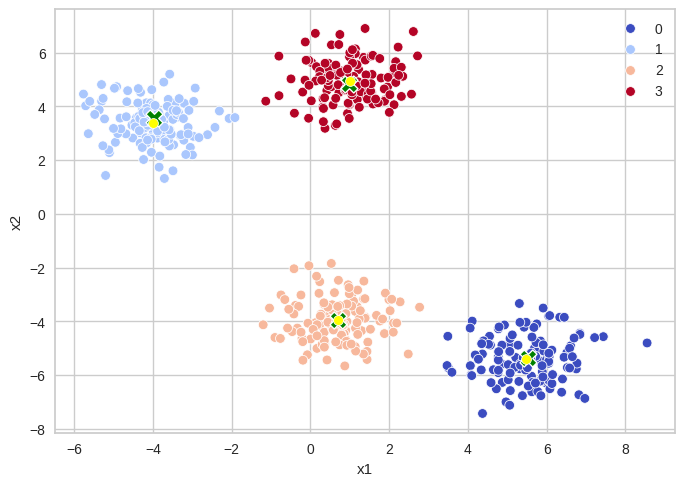

In [13]:
# Graficamos data points anteriores, centroides anteriores y centroides KMeans df_k_means_center de la predicción
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm') # discriminamos por hue='cluster'
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=150, color='green') #graficamos centroides anteriores
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='o', s=50, color='yellow') # graficamos centroids predichos KMeans
plt.show()

In [14]:
# Creamos función para graficar clusters
def vis_cluster(k):
  kmeans = KMeans(n_clusters=k)
  df_cluster = kmeans.fit_predict(x)
  df_blobs['cluster'] = df_cluster
  k_means_centers = kmeans.cluster_centers_
  df_k_means_center = pd.DataFrame(
      {
          'x1': k_means_centers[:,0],
          'x2': k_means_centers[:,1]
      }
  )
  fig = plt.figure(figsize=(9,9))
  sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
  sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=150,  color='red')
  sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='o', s=150, color='yellow')
  plt.show()

3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


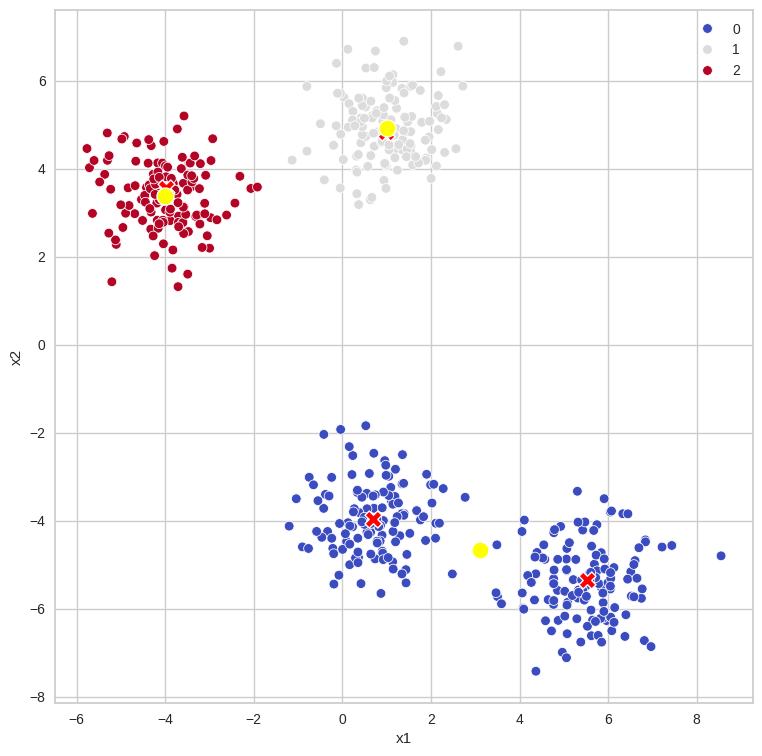

4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


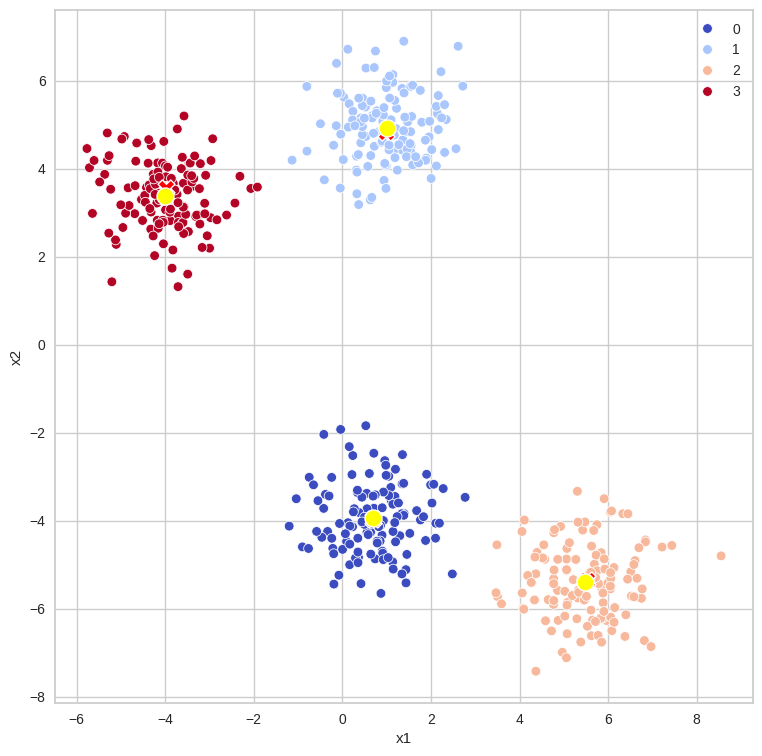

5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


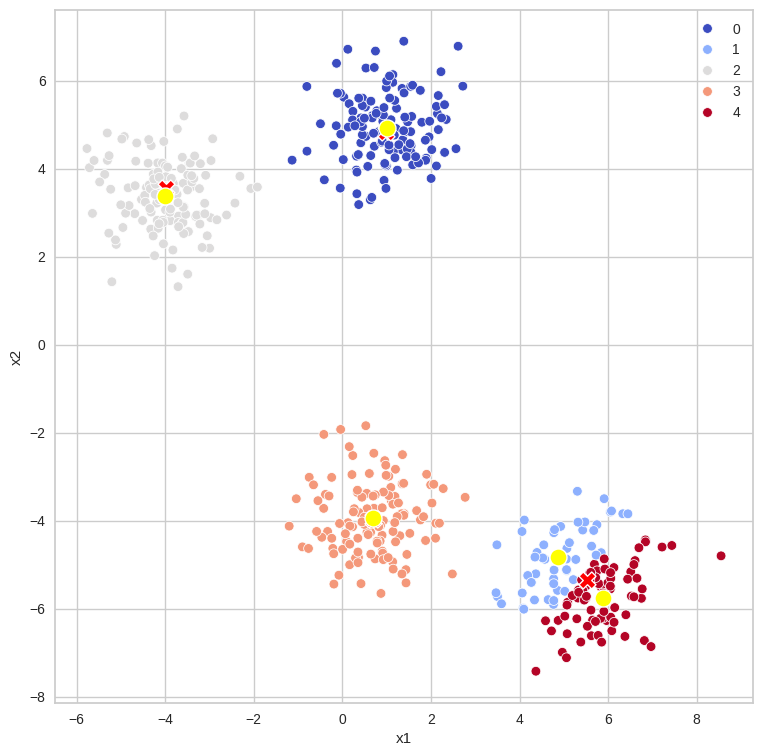

6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


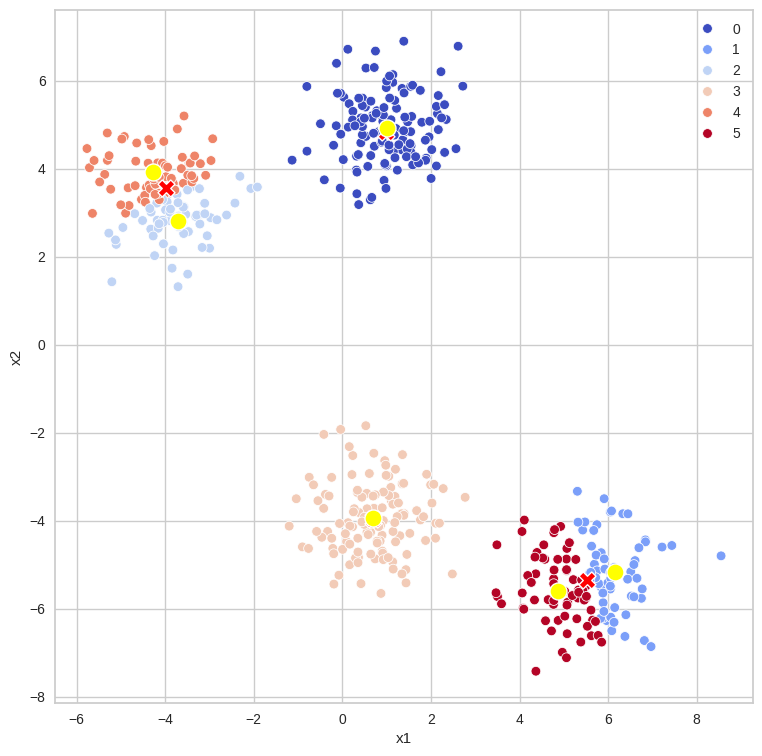

In [15]:
# realizamos una iteración sobre k
for _ in range(3,7):
  print(_)
  vis_cluster(_)

## Encontrando el valor de K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

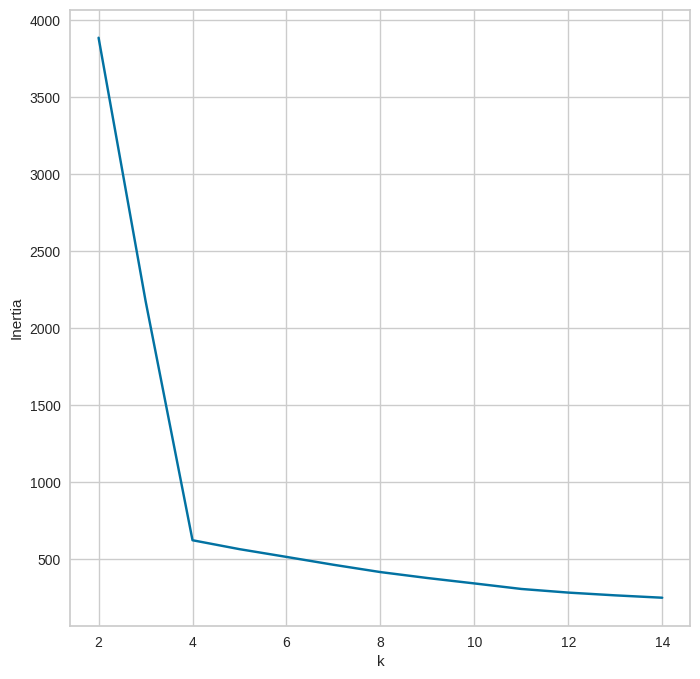

In [24]:
# Vamos a implementar el método del codo

sum_of_squared_distances = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(x)
  sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

#La gráfica arroja que se tiene un posible valor de k = 4 donde encaja en la lógica el codo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

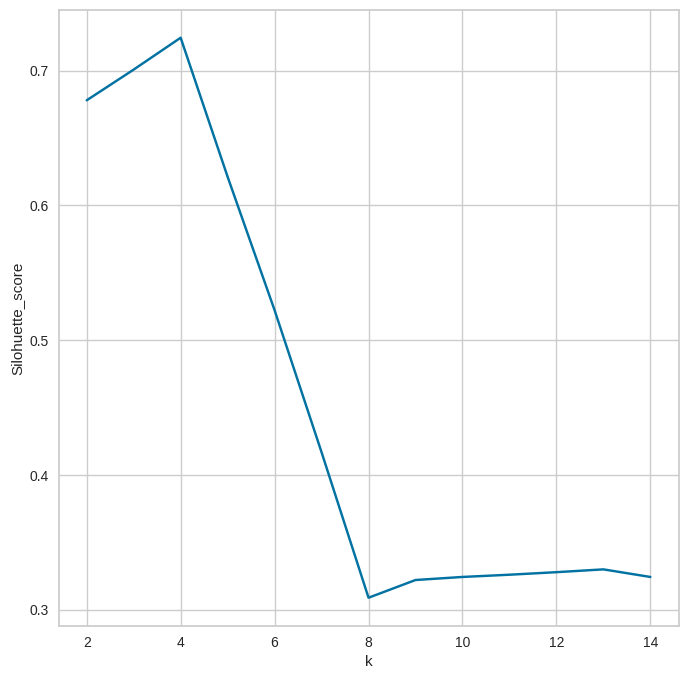

In [25]:
# haremos una validació más
# hallaremos el índice de silueta

silhouette_scores = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(x)
  y = km.predict(x)
  silhouette_scores.append(silhouette_score(x,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silohuette_score')
plt.show()

# La gráfica arroja que el coeficiente de silueta más alto, el punto más alto, es para k = 4.  Es el k óptimo.

## Evaluando clusters con K-means